In [13]:
import pandas as pd
import numpy as np

df = pd.read_excel('spotify-songs.xlsx')

df_original = df.__deepcopy__()

## Explore the data
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2001,It Wasn't Me,81,Hot Shot,Shaggy,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,66.0,1.0,0.0713,0.0561,0.000000,0.313,0.654,94.759,227600.0
1,2001,Survivor,73,Survivor,Destiny's Child,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,30.0,0.0,0.4100,0.0559,0.000000,0.775,0.619,161.109,254027.0
2,2001,Stan,84,The Marshall Mathers LP,Eminem,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,63.0,0.0,0.2380,0.0371,0.000002,0.518,0.507,80.063,404107.0
3,2001,Can't Get You out of My Head,80,Fever,Kylie Minogue,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,87.0,0.0,0.0339,0.0263,0.683000,0.115,0.964,126.007,230640.0
4,2001,Lady Marmalade - Single Edit,70,Lady Marmalade,Christina Aguilera,['dance pop'; 'pop'],75,0.754,0.811,5.0,56.0,1.0,0.0561,0.0185,0.000005,0.654,0.639,109.902,267960.0


In [41]:
# Compute number of songs per album (per artist)
album_song_counts = (
    df.groupby(['artist_name', 'album'])['track_name']
      .count()
      .rename('album_songs')
)

# Merge back into the original DataFrame
df = df.merge(album_song_counts, on=['artist_name', 'album'], how='left')

# Check result
df[['artist_name', 'album', 'album_songs']].head(10)


,artist_name,album,album_songs
0,Shaggy,Hot Shot,2
1,Destiny's Child,Survivor,3
2,Eminem,The Marshall Mathers LP,1
3,Kylie Minogue,Fever,2
4,Christina Aguilera,Lady Marmalade,1
5,Nelly Furtado,Whoa; Nelly! (Expanded Edition),2
6,Shakira,Laundry Service,2
7,Jimmy Eat World,Bleed American,1
8,Train,Drops Of Jupiter,1
9,Outkast,Stankonia,1


In [42]:
df.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popular,album_songs
0,2001,It Wasn't Me,81,Hot Shot,Shaggy,['pop rap'; 'reggae fusion'],71,0.853,0.606,0.0,...,1.0,0.0713,0.0561,0.000000,0.313,0.654,94.759,227600.0,True,2
1,2001,Survivor,73,Survivor,Destiny's Child,['dance pop'; 'girl group'; 'pop'; 'r&b'; 'urb...,69,0.514,0.911,1.0,...,0.0,0.4100,0.0559,0.000000,0.775,0.619,161.109,254027.0,False,3
2,2001,Stan,84,The Marshall Mathers LP,Eminem,['detroit hip hop'; 'hip hop'; 'rap'],88,0.780,0.768,6.0,...,0.0,0.2380,0.0371,0.000002,0.518,0.507,80.063,404107.0,True,1
3,2001,Can't Get You out of My Head,80,Fever,Kylie Minogue,['australian dance'; 'australian pop'; 'dance ...,71,0.766,0.563,9.0,...,0.0,0.0339,0.0263,0.683000,0.115,0.964,126.007,230640.0,True,2
4,2001,Lady Marmalade - Single Edit,70,Lady Marmalade,Christina Aguilera,['dance pop'; 'pop'],75,0.754,0.811,5.0,...,1.0,0.0561,0.0185,0.000005,0.654,0.639,109.902,267960.0,False,1


In [43]:
drop_cols = ['year', 'track_name', 'album', 'artist_name']

In [14]:
df.shape

(2200, 19)

In [15]:
df.isna().sum()

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
dtype: int64

In [16]:
df = df.dropna()
df.shape

(2199, 19)

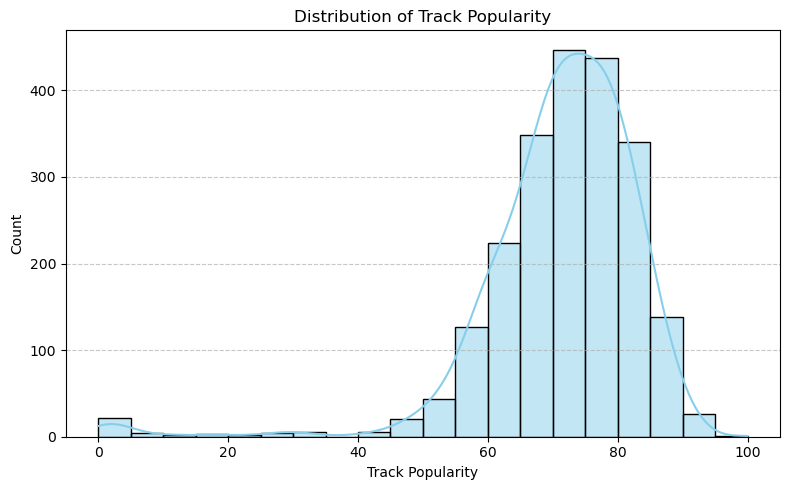

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of track popularity
plt.figure(figsize=(8,5))
sns.histplot(df['track_popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
df['track_popularity'].quantile(0.75)

79.0

In [21]:
df['popular'] = df['track_popularity'] >= 80

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'popular'],
      dtype='object')

#### Note: What do we do with genre? - Pending to explode and get corrs per gender

In [30]:
df.groupby('artist_genres')['popular'].count().mean()

3.277198211624441

In [31]:
genre_df = df[['popular', 'artist_genres']]
genre_df.sample(5)

,popular,artist_genres
366,False,['bouncy house'; 'uk dance']
216,False,['east coast hip hop'; 'gangster rap'; 'hip ho...
1060,False,['asian american hip hop'; 'dance pop'; 'pop r...
500,True,['colombian pop'; 'dance pop'; 'latin pop'; 'p...
1980,True,['latin pop'; 'reggaeton'; 'reggaeton colombia...


##### Rest of the cols

In [35]:
df.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'popular'],
      dtype='object')